# Notebook Overview
1. First, import the training set
2. Then, assign labels for prediction
3. Perform feature selection algorithm
4. Tune hyperparameters for the feature subset

# Step 1: Importing the training set and label assignment

In [1]:
import pandas as pd
import numpy as np
import os

# Define the path to your directory
path = 'C:/Users/Home PC/Documents/P5/ProjectCode/Expanded_Experiment/Files/'
os.chdir(path)

training_df = pd.read_excel('Training/training_dataset_P5.xlsx', 'Sheet1')

print('training data loaded successfully!')

training data loaded successfully!


# Step 2: assign labels for prediction and visualize distribution 
Visualize the distribution of visual sightlines between living to kitchen. <br>
<br>
Assign the labels for living to bathroom sightlines. In this instance, at least one bathroom should be visible to receive a positive label 'sufficient'

LIV_KIT_bin
0_insufficient    105
2_preferred        80
1_sufficient       71
Name: count, dtype: int64


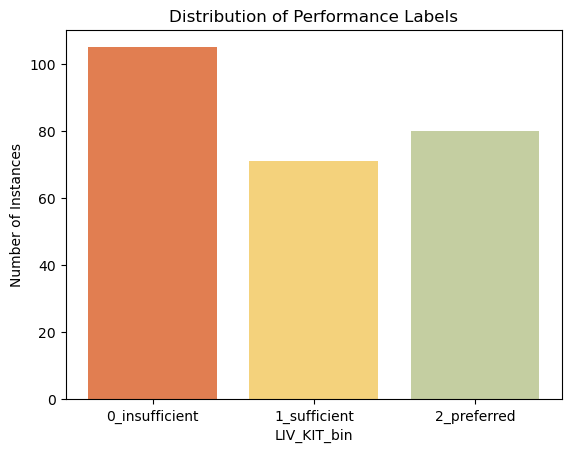

Number of unique 'unit_id' values: 256
apartment_id                             object
site_id                                   int64
building_id                               int64
plan_id                                   int64
floor_id                                  int64
                                         ...   
connectivity_kitchen_distance_p20       float64
connectivity_kitchen_distance_p80       float64
connectivity_kitchen_distance_stddev    float64
layout_biggest_rectangle_length         float64
layout_biggest_rectangle_width          float64
Length: 71, dtype: object


In [2]:
import matplotlib.pyplot as plt

# Get the counts of each category
value_counts = training_df['LIV_KIT_bin'].value_counts()
print(training_df['LIV_KIT_bin'].value_counts())

# Define custom palette for histograms with hex values
hist_palette = {
    'insufficient': '#E17E51',  # Red for insufficient
    'sufficient': '#F4D27C',    # Orange for sufficient
    'preferred': '#C4CEA1',     # Green for preferred
}

# Define the colors for each category, using the custom palette
color_map = {
    '0_insufficient': hist_palette['insufficient'],
    '1_sufficient': hist_palette['sufficient'],
    '2_preferred': hist_palette['preferred']  
}

# Specify the desired order
order = ['0_insufficient', '1_sufficient', '2_preferred']

# Reorder value_counts based on the specified order and fill missing categories with 0
ordered_values = [value_counts.get(cat, 0) for cat in order]
colors = [color_map[cat] for cat in order]

# Create a bar plot with the specified order
plt.bar(order, ordered_values, color=colors)
plt.xlabel('LIV_KIT_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()

# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.dtypes)


Assign the labels for living to bathroom sightlines. <br>
In this instance, at least one bathroom should be visible to receive a positive label 'sufficient'<br>

LIV_BATH_bin
0_insufficient    137
1_sufficient      119
Name: count, dtype: int64


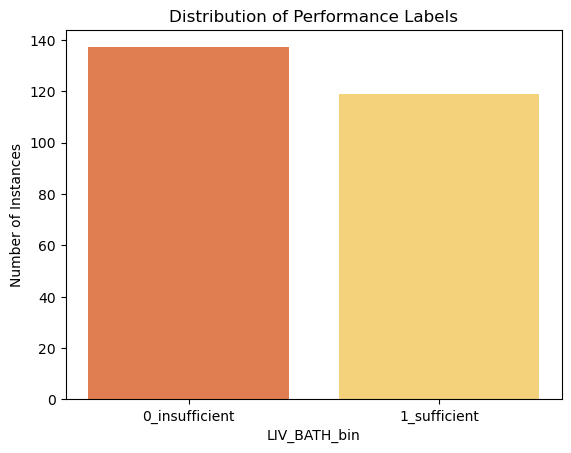

Number of unique 'unit_id' values: 256
Index(['apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id',
       'unit_id', 'area_id', 'unit_usage', 'entity_type', 'entity_subtype',
       'geometry', 'elevation', 'height', 'LIV_KIT', 'LIV_BED1', 'LIV_BED2',
       'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6', '# OF BEDS',
       'LIV_BATH1', 'LIV_BATH2', 'LIV_BATH3', '# OF BATH', 'invalid_geometry',
       'LIV_KIT_bin', 'LIV_KIT_bin_mapped', 'layout_compactness',
       'layout_std_walllengths', 'layout_perimeter', 'layout_door_perimeter',
       'layout_open_perimeter', 'layout_number_of_doors',
       'connectivity_entrance_door_distance_max',
       'connectivity_entrance_door_distance_mean',
       'connectivity_entrance_door_distance_median',
       'connectivity_entrance_door_distance_min',
       'connectivity_entrance_door_distance_p20',
       'connectivity_entrance_door_distance_p80',
       'connectivity_entrance_door_distance_stddev',
       'connectivity_betweenne

In [3]:

# Add sightlines from living to toilet label with two possible classes: insufficient and sufficient
training_df['LIV_BATH_bin'] = training_df[['LIV_BATH1', 'LIV_BATH2']].max(axis=1).apply(lambda x: '0_insufficient' if x == 0 else '1_sufficient').astype(str)

# Get the counts of each category
value_counts = training_df['LIV_BATH_bin'].value_counts()
print(training_df['LIV_BATH_bin'].value_counts())

# Specify the desired order
order = ['0_insufficient', '1_sufficient']

# Reorder value_counts based on the specified order and fill missing categories with 0
ordered_values = [value_counts.get(cat, 0) for cat in order]
colors = [color_map[cat] for cat in order]

# Create a bar plot with the specified order
plt.bar(order, ordered_values, color=colors)
plt.xlabel('LIV_BATH_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Performance Labels')
plt.show()

# Check the number of unique 'unit_id' values in the training_set DataFrame
unique_unit_ids = training_df['unit_id'].nunique()
print("Number of unique 'unit_id' values:", unique_unit_ids)
print(training_df.columns)

# Bath Bin Mapping

# Define a mapping dictionary
bin_mapping = {'0_insufficient': 0, '1_sufficient': 1}

# Map the values and create a new column
training_df['LIV_BATH_bin_mapped'] = training_df['LIV_BATH_bin'].map(bin_mapping)

pd.set_option('display.max_columns', None)  # Display all columns
print(training_df.dtypes)


# Living to bedrooms visibility [left for future expansion]
Assign living to bedroom sightlines. <br>
In this instance, we take into consideration how many bedrooms are in a household, how many of them are visible from any single point in the living room. Then, we divide the number of visible bedrooms by the total bedrooms in the household to get a ratio for the visual connection between living to bedroom. <br>
<br>
1. A visibility ratio of above 0.50 of bedrooms is sufficient <br>
2. A visibility ratio of less than 0.50 is sufficient<br>
3. A visibility ratio of less than 0.25 is insufficient <br>

     LIV_BED_count  LIV_BED_ratio     LIV_BED_bin
0                1       0.333333    1_sufficient
1                0       0.000000  0_insufficient
2                0       0.000000  0_insufficient
3                2       0.500000    1_sufficient
4                0       0.000000  0_insufficient
..             ...            ...             ...
251              2       0.500000    1_sufficient
252              2       0.666667     2_preferred
253              0       0.000000  0_insufficient
254              1       0.500000    1_sufficient
255              0       0.000000  0_insufficient

[256 rows x 3 columns]
LIV_BED_bin
0_insufficient    118
2_preferred        72
1_sufficient       66
Name: count, dtype: int64


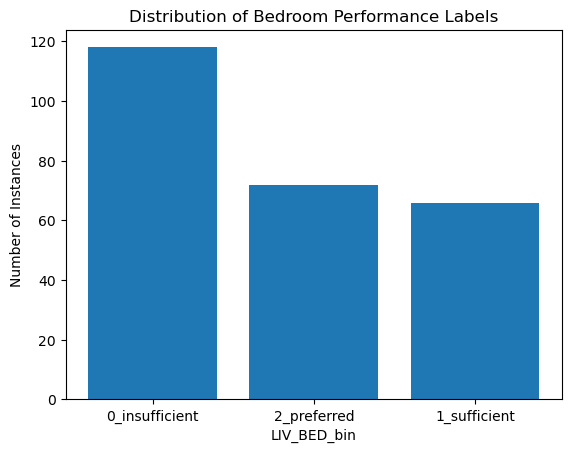

In [4]:
# Calculate the number of bedrooms with sightline greater than 0
training_df['LIV_BED_count'] = training_df[['LIV_BED1', 'LIV_BED2', 'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6']].apply(lambda row: (row > 0).sum(), axis=1)
# Calculate the ratio
training_df['LIV_BED_ratio'] = training_df['LIV_BED_count'] / training_df['# OF BEDS']

# Create the LIV_BED_bin column based on the ratio
def classify_bed_ratio(ratio):
    if ratio > 0.5:
        return '2_preferred'
    elif ratio > 0.25:
        return '1_sufficient'
    else:
        return '0_insufficient'

training_df['LIV_BED_bin'] = training_df['LIV_BED_ratio'].apply(classify_bed_ratio)

# Print the resulting DataFrame
print(training_df[['LIV_BED_count', 'LIV_BED_ratio', 'LIV_BED_bin']])

# Get the counts of each category
value_counts = training_df['LIV_BED_bin'].value_counts()
print(training_df['LIV_BED_bin'].value_counts())

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('LIV_BED_bin')
plt.ylabel('Number of Instances')
plt.title('Distribution of Bedroom Performance Labels')
plt.show()

# Feature selection

Now we want to test the entire feature list to see how well they help with predicting a correct label based on the isovist values. <br>
In this step, I identify all the possible features relevant for the model and take one value from them. I.e., take the mean 20 and 80 percentile values.<br>

In [5]:
# Create a DataFrame with column indices and names
index_names_df = pd.DataFrame({'Index': range(len(training_df.columns)), 'Column Name': training_df.columns})

# Convert DataFrame to a list of tuples (index, column name)
index_names_list = list(index_names_df.to_records(index=False))

# Print the list of tuples
print("List of column indices and names:")
print(index_names_list)



List of column indices and names:
[(0, 'apartment_id'), (1, 'site_id'), (2, 'building_id'), (3, 'plan_id'), (4, 'floor_id'), (5, 'unit_id'), (6, 'area_id'), (7, 'unit_usage'), (8, 'entity_type'), (9, 'entity_subtype'), (10, 'geometry'), (11, 'elevation'), (12, 'height'), (13, 'LIV_KIT'), (14, 'LIV_BED1'), (15, 'LIV_BED2'), (16, 'LIV_BED3'), (17, 'LIV_BED4'), (18, 'LIV_BED5'), (19, 'LIV_BED6'), (20, '# OF BEDS'), (21, 'LIV_BATH1'), (22, 'LIV_BATH2'), (23, 'LIV_BATH3'), (24, '# OF BATH'), (25, 'invalid_geometry'), (26, 'LIV_KIT_bin'), (27, 'LIV_KIT_bin_mapped'), (28, 'layout_compactness'), (29, 'layout_std_walllengths'), (30, 'layout_perimeter'), (31, 'layout_door_perimeter'), (32, 'layout_open_perimeter'), (33, 'layout_number_of_doors'), (34, 'connectivity_entrance_door_distance_max'), (35, 'connectivity_entrance_door_distance_mean'), (36, 'connectivity_entrance_door_distance_median'), (37, 'connectivity_entrance_door_distance_min'), (38, 'connectivity_entrance_door_distance_p20'), (39,

Select the feature set, including the <u>target variables</u> for of isovist value bin classes, by assigning a number to each feature to call out the ones relevant based on their index value

In [9]:
# Add all fitures from simulation file 
column_indices = [[26,27,71,72], # All isovist assessment result classes
                  [28,29,30,31,32,32,33], # Layout compactness
                  [], # Adjacencies and relationships
                  [], # Centrality 
                  [38,39], # Distance to entrance door 
                  [45,46], # Betweenness
                  [52,53], # Closeness
                  [], # (living?) Room distances
                  [], # Living - Dining distance
                  [59,60], # Bathroom distance
                  [66,67], # Kitchen distance
                  [], # Distance to balcony
                  [69,70]] # Layout biggest rectangle length and width



# Rename the dataframe with the final selection
df_sel = training_df.iloc[:, [item for sublist in column_indices for item in sublist]]

# Get column names of Swiss_sim_selected
column_names = list(training_df.columns)
print(column_names)

['apartment_id', 'site_id', 'building_id', 'plan_id', 'floor_id', 'unit_id', 'area_id', 'unit_usage', 'entity_type', 'entity_subtype', 'geometry', 'elevation', 'height', 'LIV_KIT', 'LIV_BED1', 'LIV_BED2', 'LIV_BED3', 'LIV_BED4', 'LIV_BED5', 'LIV_BED6', '# OF BEDS', 'LIV_BATH1', 'LIV_BATH2', 'LIV_BATH3', '# OF BATH', 'invalid_geometry', 'LIV_KIT_bin', 'LIV_KIT_bin_mapped', 'layout_compactness', 'layout_std_walllengths', 'layout_perimeter', 'layout_door_perimeter', 'layout_open_perimeter', 'layout_number_of_doors', 'connectivity_entrance_door_distance_max', 'connectivity_entrance_door_distance_mean', 'connectivity_entrance_door_distance_median', 'connectivity_entrance_door_distance_min', 'connectivity_entrance_door_distance_p20', 'connectivity_entrance_door_distance_p80', 'connectivity_entrance_door_distance_stddev', 'connectivity_betweenness_centrality_max', 'connectivity_betweenness_centrality_mean', 'connectivity_betweenness_centrality_median', 'connectivity_betweenness_centrality_min

## Import Libraries <br>
We will be using scikit-learn for building our random forest classifier. The objective of the model is to classify the visual connectivity of spaces based on features derived from the Swiss Dwelligns simulations file.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import KFold

print('OK!')


OK!


##  Custom Scoring Function for Subset Accuracy
In this section, we define and implement a custom scoring function specifically designed for multi-output classification tasks. This custom scoring function, known as subset accuracy, evaluates the performance of our model by checking if all predicted labels for each instance match the true labels exactly.<br><br>






Why Subset Accuracy?<br><br>

- Stringency: Subset accuracy is a stringent metric. It considers a prediction correct only if all labels for an instance are correctly predicted. This means that even if only one label is incorrect, the entire prediction for that instance is considered incorrect.<br>
- Comprehensive Evaluation: This metric provides a comprehensive evaluation of our model's performance, ensuring that the model performs well across all outputs, not just on average.
- Applicability: Subset accuracy is particularly useful in scenarios where partial correctness is not acceptable, such as in medical diagnoses, safety systems, or quality control.<br><br>
<br>
The custom scoring function subset_accuracy_score is defined as follows:
<br>
- y_true == y_pred: Creates a boolean array indicating which predictions match the true values.<br>
- np.all(..., axis=1): Checks if all labels for each instance are correct.<br>
- np.mean(...): Calculates the mean of these boolean values, providing the subset accuracy score.<br><br>

We then wrap this function using make_scorer from scikit-learn to make it compatible with scikit-learn's model selection and evaluation tools:
<br>
This custom scorer will be used in subsequent steps, such as hyperparameter tuning and feature selection, to ensure that our model is evaluated and optimized based on its ability to predict all output labels correctly for each instance.<br>




In [15]:
# Custom scoring function for subset accuracy
def subset_accuracy_score(y_true, y_pred):
    return np.mean(np.all(y_true == y_pred, axis=1))
subset_accuracy_scorer = make_scorer(subset_accuracy_score)

# Custom scoring function for Hamming loss
def hamming_loss_score(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)
hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)

print('OK!')


OK!


## Hyperparameter range
Here you can assign the individual hyperparameters for the Random Forest Classifier or comment out the ones that should be left at default values. 

In [27]:
# Model parameters
test_size = 0.3
random_state = 42  # Fixed random state for reproducibility
cv_folds = 5
n_estimator = 300

# Set up cross-validation with a fixed random seed
cv = KFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

print('OK!')


OK!


## Here we assign all the outputs we need to classify
setting up the y training, for instance:<br>
- Living to kitchen sightlines labels (0_insufficient,1_sufficient,2_preferred)
- Living to kitchen sightlines integer class (0, 1, 2)
- Living to nearest bathroom sightline labels (0_insufficient,1_sufficient)
- Living to nearest bathroom sightline integer class (0, 1)<br>
The features have already been selected. Make sure to remove all assessment data including raw values, bins, and integer classes. 

In [16]:
# Assign training classes with multiple outputs
X = df_sel.drop(columns=[
    'LIV_KIT_bin', 
    'LIV_KIT_bin_mapped', 
    'LIV_BATH_bin', 
    'LIV_BATH_bin_mapped'
    # 'LIV_BED_bin' # not yet included in the code due to inconsistencies in the data generated from Grasshopper
])
y = df_sel[['LIV_KIT_bin', 'LIV_BATH_bin']] #removed: 'LIV_BED_bin'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print('OK!')


OK!


## The model selection is made from SKLearn library

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=random_state)

print('OK!')


OK!


## Multi-output wrapper from SKLearn to classify multiple outputs. 

In [28]:
from sklearn.multioutput import MultiOutputClassifier

n_estimator=300

# Wrap the RandomForestClassifier in a MultiOutputClassifier
multi_target_rf = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)

print('OK!')


OK!


## Feature selection to search for the most suitable feature set in this multi-output classification model

In [29]:
# Select all the features in the train set for feature selection

num_of_features = X_train.shape[1]
print('Number of features to train on is', num_of_features)
train_features = X_train.columns.tolist()
print(train_features)

Number of features to train on is 19
['layout_compactness', 'layout_std_walllengths', 'layout_perimeter', 'layout_door_perimeter', 'layout_open_perimeter', 'layout_open_perimeter', 'layout_number_of_doors', 'connectivity_entrance_door_distance_p20', 'connectivity_entrance_door_distance_p80', 'connectivity_betweenness_centrality_p20', 'connectivity_betweenness_centrality_p80', 'connectivity_closeness_centrality_p20', 'connectivity_closeness_centrality_p80', 'connectivity_bathroom_distance_p20', 'connectivity_bathroom_distance_p80', 'connectivity_kitchen_distance_p20', 'connectivity_kitchen_distance_p80', 'layout_biggest_rectangle_length', 'layout_biggest_rectangle_width']


In [31]:
from sklearn.metrics import make_scorer, hamming_loss, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Custom scoring functions
def hamming_loss_score(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)

def subset_accuracy_score(y_true, y_pred):
    return np.mean(np.all(y_true == y_pred, axis=1))

hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)
subset_accuracy_scorer = make_scorer(subset_accuracy_score, greater_is_better=True)

# Set up cross-validation with a fixed random seed
cv = KFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

# Maximum number of features to select
max_n_features = min(num_of_features, X_train.shape[1])


# Initialize variables to track the best score and features
best_score = 0  # Start with the lowest possible value since we are maximizing subset accuracy
best_features = None
feature_counts = []
hamming_losses = []
subset_accuracies = []

print('OK!')

OK!


Sequential Forward Selection (SFS) method<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

Number of features: 1
Selected features: Index(['layout_door_perimeter'], dtype='object')
Hamming loss: 0.4155844155844156
Subset accuracy: 0.33766233766233766
Number of features: 2
Selected features: Index(['layout_door_perimeter', 'connectivity_bathroom_distance_p20'], dtype='object')
Hamming loss: 0.2727272727272727
Subset accuracy: 0.5454545454545454
Number of features: 3
Selected features: Index(['layout_door_perimeter', 'connectivity_bathroom_distance_p20',
       'connectivity_kitchen_distance_p20'],
      dtype='object')
Hamming loss: 0.19480519480519481
Subset accuracy: 0.6493506493506493
Number of features: 4
Selected features: Index(['layout_door_perimeter', 'connectivity_bathroom_distance_p20',
       'connectivity_kitchen_distance_p20', 'layout_biggest_rectangle_width'],
      dtype='object')
Hamming loss: 0.22727272727272727
Subset accuracy: 0.6103896103896104
Number of features: 5
Selected features: Index(['layout_std_walllengths', 'layout_door_perimeter',
       'connec

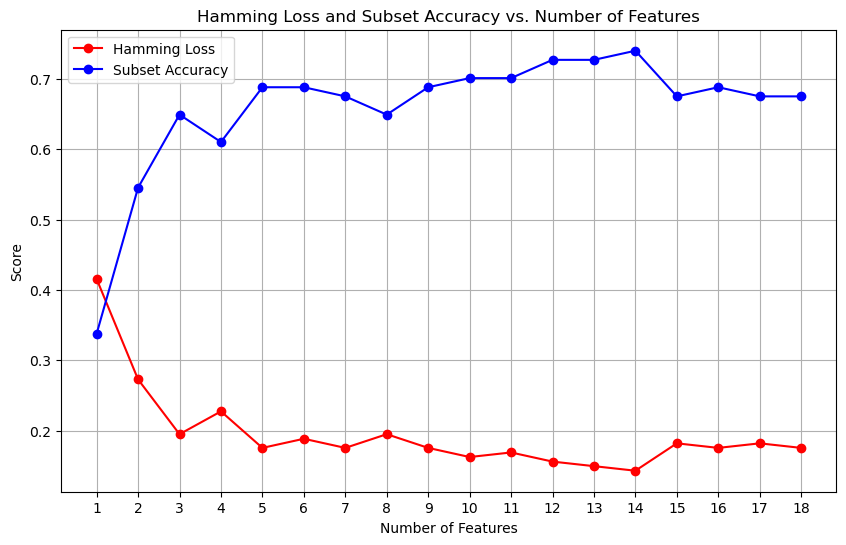

In [24]:
from sklearn.metrics import make_scorer, hamming_loss, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import numpy as np

# Custom scoring functions
def hamming_loss_score(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)

def subset_accuracy_score(y_true, y_pred):
    return np.mean(np.all(y_true == y_pred, axis=1))

hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)
subset_accuracy_scorer = make_scorer(subset_accuracy_score, greater_is_better=True)

# Maximum number of features to select
max_n_features = min(num_of_features, X_train.shape[1])

# Initialize variables to track the best score and features
best_score = 0  # Start with the lowest possible value since we are maximizing subset accuracy
best_features = None
feature_counts = []
hamming_losses = []
subset_accuracies = []

# Sequential Feature Selector with a limit on the number of features
for n_features in range(1, max_n_features + 1):
    multi_target_rf = RandomForestClassifier(n_estimators=n_estimator, random_state=random_state)
    
    sfs = SequentialFeatureSelector(
        multi_target_rf, 
        n_features_to_select=n_features, 
        direction='forward', 
        scoring=subset_accuracy_scorer,  # Optimize for subset accuracy
        cv=cv, 
        n_jobs=-1
    )
    try:
        sfs.fit(X_train, y_train)
        X_train_selected = sfs.transform(X_train)
        X_test_selected = sfs.transform(X_test)  # Transform the test set using the selected features
        
        # Reinitialize the random forest model
        multi_target_rf = RandomForestClassifier(random_state=random_state)  # Ensure to use the same random parameters as before
        multi_target_rf.fit(X_train_selected, y_train)
        y_test_pred = multi_target_rf.predict(X_test_selected)
        
        hamming_loss = hamming_loss_score(y_test, y_test_pred)  # Calculate Hamming loss on the test set
        subset_accuracy = subset_accuracy_score(y_test, y_test_pred)  # Calculate subset accuracy on the test set
        
        # Debugging: Print intermediate results
        print(f"Number of features: {n_features}")
        print(f"Selected features: {X_train.columns[sfs.get_support()]}")
        print(f"Hamming loss: {hamming_loss}")
        print(f"Subset accuracy: {subset_accuracy}")
        
        feature_counts.append(n_features)
        hamming_losses.append(hamming_loss)
        subset_accuracies.append(subset_accuracy)
        
        if subset_accuracy > best_score:
            best_score = subset_accuracy
            best_features = X_train.columns[sfs.get_support()]
            best_n_features = n_features
    except Exception as e:
        print(f"Error with {n_features} features: {e}")

# Output the best number of features and the selected features
print(f"Best number of features: {best_n_features}")
print(f"Selected features: {best_features}")

# Plot the Hamming loss and subset accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, hamming_losses, marker='o', label='Hamming Loss', color='red')
plt.plot(feature_counts, subset_accuracies, marker='o', label='Subset Accuracy', color='blue')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Hamming Loss and Subset Accuracy vs. Number of Features')
plt.grid(True)
plt.legend()
plt.xticks(feature_counts)  # Set x-ticks to full integer values
plt.show()


## The best_features variable stores the best features found in the sequential feature selector

In [26]:
best_features

Index(['layout_compactness', 'layout_std_walllengths', 'layout_perimeter',
       'layout_door_perimeter', 'connectivity_entrance_door_distance_p80',
       'connectivity_betweenness_centrality_p80',
       'connectivity_closeness_centrality_p20',
       'connectivity_closeness_centrality_p80',
       'connectivity_bathroom_distance_p20',
       'connectivity_bathroom_distance_p80',
       'connectivity_kitchen_distance_p20',
       'connectivity_kitchen_distance_p80', 'layout_biggest_rectangle_length',
       'layout_biggest_rectangle_width'],
      dtype='object')

### Sequential Backward Selection (SBS) method<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html<br>

### Note: restrart the notebook and comment out the forward feature selector and run this instead.

In [16]:
# # Sequential Backward Selector with backward selection
# for n_features in range(X_train.shape[1], 0, -1):
#     multi_target_rf = RandomForestClassifier(n_estimators=300, random_state=random_state)
    
#     sfs = SequentialFeatureSelector(
#         multi_target_rf, 
#         n_features_to_select=n_features, 
#         direction='backward', 
#         scoring=subset_accuracy_scorer,  # Optimize for subset accuracy
#         cv=cv, 
#         n_jobs=-1
#     )
#     try:
#         sfs.fit(X_train, y_train)
#         X_train_selected = sfs.transform(X_train)
#         X_test_selected = sfs.transform(X_test)  # Transform the test set using the selected features
        
#         # Reinitialize the random forest model
#         multi_target_rf.fit(X_train_selected, y_train)
#         y_test_pred = multi_target_rf.predict(X_test_selected)
        
#         hamming_loss = hamming_loss_score(y_test, y_test_pred)  # Calculate Hamming loss on the test set
#         subset_accuracy = subset_accuracy_score(y_test, y_test_pred)  # Calculate subset accuracy on the test set
        
#         # Debugging: Print intermediate results
#         print(f"Number of features: {n_features}")
#         print(f"Selected features: {X_train.columns[sfs.get_support()]}")
#         print(f"Hamming loss: {hamming_loss}")
#         print(f"Subset accuracy: {subset_accuracy}")
        
#         feature_counts.append(n_features)
#         hamming_losses.append(hamming_loss)
#         subset_accuracies.append(subset_accuracy)
        
#         if subset_accuracy > best_score:
#             best_score = subset_accuracy
#             best_features = X_train.columns[sfs.get_support()]
#             best_n_features = n_features
#     except Exception as e:
#         print(f"Error with {n_features} features: {e}")

# # Output the best number of features and the selected features
# print(f"Best number of features: {best_n_features}")
# print(f"Selected features: {best_features}")

# # Plot the Hamming loss and subset accuracy scores
# plt.figure(figsize=(10, 6))
# plt.plot(feature_counts, hamming_losses, marker='o', label='Hamming Loss', color='red')
# plt.plot(feature_counts, subset_accuracies, marker='o', label='Subset Accuracy', color='blue')
# plt.xlabel('Number of Features')
# plt.ylabel('Score')
# plt.title('Hamming Loss and Subset Accuracy vs. Number of Features')
# plt.gca().invert_xaxis()  # Invert x-axis to have all features on the left and least on the right
# plt.grid(True)
# plt.legend()
# plt.xticks(feature_counts)  # Set x-ticks to full integer values
# plt.show()


In [17]:
# from sklearn.metrics import make_scorer, hamming_loss, accuracy_score
# from sklearn.feature_selection import SequentialFeatureSelector
# import matplotlib.pyplot as plt
# import numpy as np

# # Custom scoring functions
# def hamming_loss_score(y_true, y_pred):
#     return np.sum(y_true.values != y_pred) / np.size(y_true)

# def subset_accuracy_score(y_true, y_pred):
#     return np.mean(np.all(y_true == y_pred, axis=1))

# hamming_loss_scorer = make_scorer(hamming_loss_score, greater_is_better=False)
# subset_accuracy_scorer = make_scorer(subset_accuracy_score, greater_is_better=True)

# # Maximum number of features to select
# max_n_features = min(19, X_train.shape[1])

# # Initialize variables to track the best score and features
# best_score = 0  # Start with the lowest possible value since we are maximizing subset accuracy
# best_features = None
# feature_counts = []
# hamming_losses = []
# subset_accuracies = []

# # Sequential Feature Selector with a limit on the number of features
# for n_features in range(1, max_n_features + 1):
#     multi_target_rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    
#     sfs = SequentialFeatureSelector(
#         multi_target_rf, 
#         n_features_to_select=n_features, 
#         direction='forward', 
#         scoring=subset_accuracy_scorer,  # Optimize for subset accuracy
#         cv=cv, 
#         n_jobs=-1
#     )
#     try:
#         sfs.fit(X_train, y_train)
#         X_train_selected = sfs.transform(X_train)
#         X_test_selected = sfs.transform(X_test)  # Transform the test set using the selected features
        
#         # Reinitialize the random forest model
#         multi_target_rf = RandomForestClassifier(random_state=random_state)  # Ensure to use the same parameters as before
#         multi_target_rf.fit(X_train_selected, y_train)
#         y_test_pred = multi_target_rf.predict(X_test_selected)
        
#         hamming_loss = hamming_loss_score(y_test, y_test_pred)  # Calculate Hamming loss on the test set
#         subset_accuracy = subset_accuracy_score(y_test, y_test_pred)  # Calculate subset accuracy on the test set
        
#         # Debugging: Print intermediate results
#         print(f"Number of features: {n_features}")
#         print(f"Selected features: {X_train.columns[sfs.get_support()]}")
#         print(f"Hamming loss: {hamming_loss}")
#         print(f"Subset accuracy: {subset_accuracy}")
        
#         feature_counts.append(n_features)
#         hamming_losses.append(hamming_loss)
#         subset_accuracies.append(subset_accuracy)
        
#         if subset_accuracy > best_score:
#             best_score = subset_accuracy
#             best_features = X_train.columns[sfs.get_support()]
#             best_n_features = n_features
#     except Exception as e:
#         print(f"Error with {n_features} features: {e}")

# # Output the best number of features and the selected features
# print(f"Best number of features: {best_n_features}")
# print(f"Selected features: {best_features}")

# # Plot the Hamming loss and subset accuracy scores
# plt.figure(figsize=(10, 6))
# plt.plot(feature_counts, hamming_losses, marker='o', label='Hamming Loss', color='red')
# plt.plot(feature_counts, subset_accuracies, marker='o', label='Subset Accuracy', color='blue')
# plt.xlabel('Number of Features')
# plt.ylabel('Score')
# plt.title('Hamming Loss and Subset Accuracy vs. Number of Features')
# plt.grid(True)
# plt.legend()
# plt.xticks(feature_counts)  # Set x-ticks to full integer values
# plt.show()


## Hyperparamreter and Training


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2116 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\multioutput.py", line 537, in fit
    super().fit(X, Y, sample_weight=sample_weight, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
     


Best Parameters found by GridSearchCV:
{'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 205}
Accuracy for LIV_KIT_bin: 0.8441558441558441
Classification Report for LIV_KIT_bin:
                precision    recall  f1-score   support

0_insufficient       0.79      0.90      0.84        30
  1_sufficient       0.81      0.74      0.77        23
   2_preferred       0.95      0.88      0.91        24

      accuracy                           0.84        77
     macro avg       0.85      0.84      0.84        77
  weighted avg       0.85      0.84      0.84        77



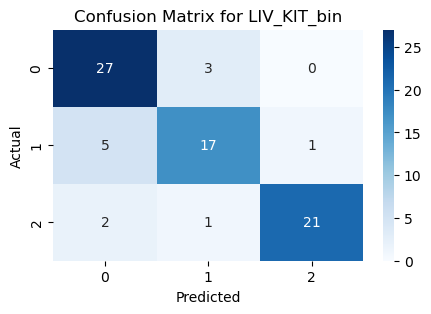

Accuracy for LIV_BATH_bin: 0.8051948051948052
Classification Report for LIV_BATH_bin:
                precision    recall  f1-score   support

0_insufficient       0.82      0.79      0.81        39
  1_sufficient       0.79      0.82      0.81        38

      accuracy                           0.81        77
     macro avg       0.81      0.81      0.81        77
  weighted avg       0.81      0.81      0.81        77



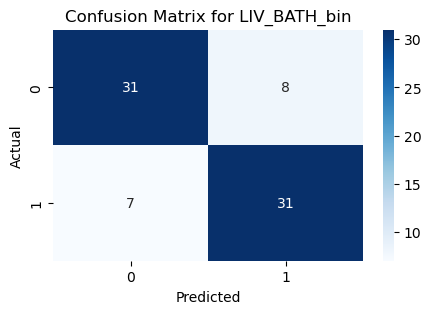

Hamming Loss: 0.17532467532467533
Subset Accuracy: 0.6753246753246753


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier



# Define hyperparameters for grid search
param_grid = {
    'estimator__n_estimators': [int(x) for x in np.linspace(start=50, stop=750, num=10)],  # Number of trees in the forest
    # 'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'estimator__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    # 'estimator__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    # 'estimator__max_leaf_nodes': [None, 10, 20, 30],  # Maximum number of leaf nodes
    # 'estimator__min_impurity_decrease': [0.0, 0.01, 0.1],  # Minimum impurity decrease to split a node
    # 'estimator__oob_score': [False, True],  # Whether to use out-of-bag samples to estimate the generalization accuracy
    # 'estimator__warm_start': [False, True],  # Reuse the solution of the previous call to fit and add more estimators to the ensemble
    # 'estimator__n_jobs': [None, -1]  # Number of jobs to run in parallel
}


# Transform the training and testing sets to include only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Initialize GridSearchCV with the MultiOutputClassifier and the parameter grid
multi_target_rf = MultiOutputClassifier(RandomForestClassifier(random_state=random_state))
grid_search = GridSearchCV(estimator=multi_target_rf, param_grid=param_grid, cv=cv, scoring=subset_accuracy_scorer, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the training data with selected features
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the model using the best parameters
best_rf = grid_search.best_estimator_

# Predict on the testing set with selected features
y_pred_test = best_rf.predict(X_test_selected)

# Evaluate each output individually
for i, col in enumerate(y_train.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])
    print(f"Accuracy for {col}: {accuracy}")
    print(f"Classification Report for {col}:\n{classification_report(y_test.iloc[:, i], y_pred_test[:, i])}")
    cm = confusion_matrix(y_test.iloc[:, i], y_pred_test[:, i])
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Calculate Hamming loss manually
def calculate_hamming_loss(y_true, y_pred):
    return np.sum(y_true.values != y_pred) / np.size(y_true)

hamming = calculate_hamming_loss(y_test, y_pred_test)
print(f"Hamming Loss: {hamming}")

# Calculate subset accuracy
subset_accuracy = np.mean(np.all(y_test.values == y_pred_test, axis=1))
print(f"Subset Accuracy: {subset_accuracy}")


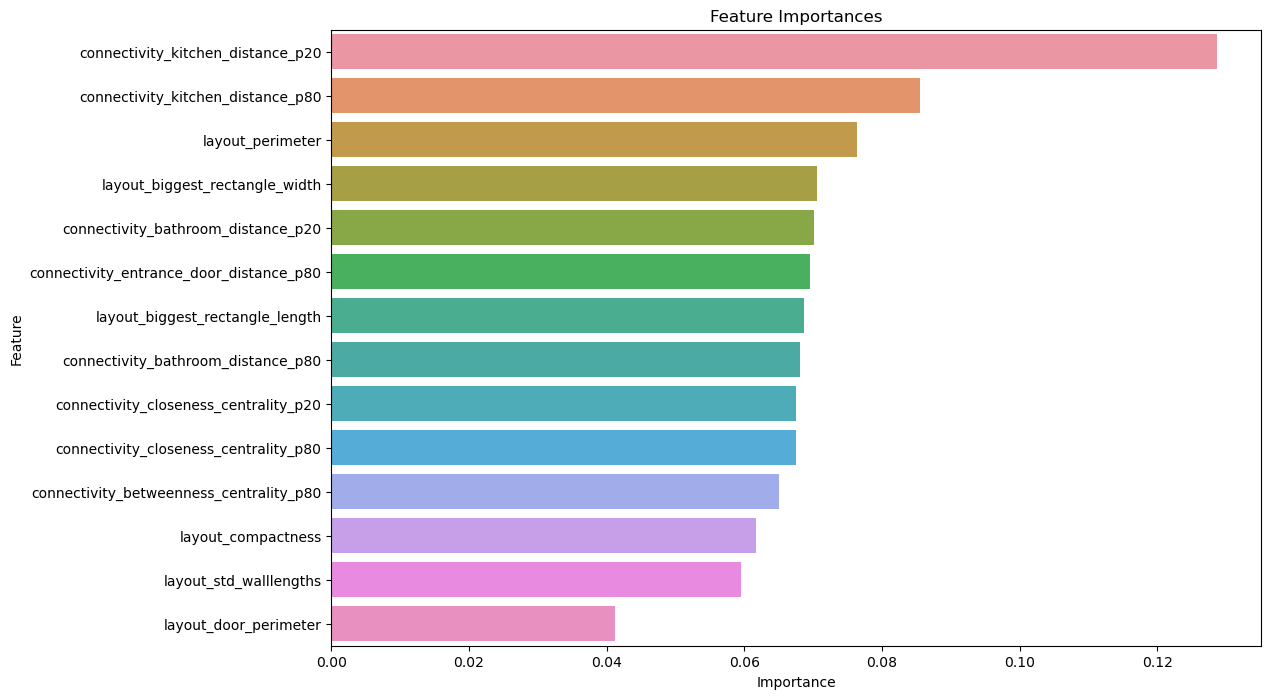

In [19]:
# After the completion of the evaluation and confusion matrix

# Extract feature importances from each RandomForestClassifier in the MultiOutputClassifier
feature_importances = np.zeros(X_train_selected.shape[1])

for estimator in best_rf.estimators_:
    feature_importances += estimator.feature_importances_

# Average the feature importances
feature_importances /= len(best_rf.estimators_)

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'feature': X_train_selected.columns,
    'importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
